<a href="https://colab.research.google.com/github/Deolinda1506/Principle_Component_Analysis/blob/main/Copy_of_Template_PCA_Formative_1%5B2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [5]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

import numpy as np
import pandas as pd

# Load dataset
data = pd.read_csv("fuel_econ.csv")
data = data.select_dtypes(include=[np.number])  # Keep only numerical columns

# Standardizing data: (Data - Mean) / Standard Deviation
standardized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
print("First few rows of data:")
print(standardized_data.head())


First few rows of data:
         id      year  cylinders     displ       pv2       pv4      city  \
0 -1.737140 -1.475835   0.283102  0.650536  1.467096 -1.217378 -0.859960   
1 -1.736684 -1.475835  -0.781816 -0.727998  1.864762 -1.217378  0.006427   
2 -1.736227 -1.475835   0.283102  0.497365  1.864762 -1.217378 -0.694416   
3 -1.735770 -1.475835   0.283102  0.497365  1.864762 -1.217378 -0.782800   
4 -1.735313 -1.475835  -0.781816 -0.421657 -0.627278  0.734890  0.471083   

      UCity   highway  UHighway      comb       co2   feScore  ghgScore  
0 -0.852430 -1.290630 -1.392475 -1.008323  1.022838 -0.950580 -0.945755  
1 -0.117434  0.184947 -0.039200  0.071864 -0.298550  0.188608  0.194258  
2 -0.753245 -0.592020 -0.851750 -0.686339  0.567934 -0.380986 -0.375749  
3 -0.830286 -0.827384 -1.027588 -0.818651  0.752062 -0.380986 -0.375749  
4  0.433147  0.967516  0.992531  0.648059 -0.720961  1.327796  1.334271  
(3929, 14)


In [6]:
# Prints the number of rows and columns in the standardized_data
print(standardized_data.shape)


(3929, 14)


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [8]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)  # Display the covariance matrix


Covariance Matrix:
[[ 1.00025458  0.98591866 -0.06011148 -0.07468488 -0.00657025 -0.02195656
   0.09182316  0.09124849  0.0906161   0.09538375  0.09382686 -0.09974229
  -0.1279056  -0.12235207]
 [ 0.98591866  1.00025458 -0.05532701 -0.07044161  0.00623397 -0.03365174
   0.06806739  0.06675938  0.07330836  0.07766039  0.07201181 -0.0811853
  -0.1498676  -0.14517775]
 [-0.06011148 -0.05532701  1.00025458  0.93411019  0.24763384 -0.00426546
  -0.69327904 -0.66619842 -0.76646982 -0.77169964 -0.73821112  0.84848979
  -0.78405759 -0.78201448]
 [-0.07468488 -0.07044161  0.93411019  1.00025458  0.2594021   0.02207729
  -0.71366074 -0.6863403  -0.78418374 -0.78865771 -0.75859024  0.85559254
  -0.7936343  -0.79141752]
 [-0.00657025  0.00623397  0.24763384  0.2594021   1.00025458 -0.66581137
  -0.27817962 -0.27261515 -0.29688365 -0.29858023 -0.29095711  0.28727323
  -0.2961638  -0.29323103]
 [-0.02195656 -0.03365174 -0.00426546  0.02207729 -0.66581137  1.00025458
   0.03519659  0.03787859  0.074

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [12]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Compute eigenvalues & eigenvectors

# Display the results
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [8.95720924e+00 2.06777956e+00 1.59364217e+00 6.70587666e-01
 3.01684118e-01 1.61017548e-01 1.25550471e-01 6.40205207e-02
 3.23528963e-02 1.36962433e-02 9.24627112e-03 4.24637785e-03
 2.14358185e-03 3.87485886e-04]
Eigenvectors:
 [[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803619e-02  5.6900

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [14]:
# Step 5: Sort Principal Components

# Get indices of sorted eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors accordingly
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display results
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [8.95720924e+00 2.06777956e+00 1.59364217e+00 6.70587666e-01
 3.01684118e-01 1.61017548e-01 1.25550471e-01 6.40205207e-02
 3.23528963e-02 1.36962433e-02 9.24627112e-03 4.24637785e-03
 2.14358185e-03 3.87485886e-04]
Sorted Eigenvectors:
 [[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.398036

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [17]:
# Step 6: Project Data onto Principal Components
# Determine number of components
num_components = 3

# Select the top `num_components` eigenvectors (principal components)
top_eigenvectors = sorted_eigenvectors[:, :num_components]  # Take the first `num_components` eigenvectors

# Project the original standardized data onto these top eigenvectors
reduced_data = np.dot(standardized_data, top_eigenvectors)

# Display the first 5 rows of the reduced data
print(reduced_data[:5])

[[-3.19146207  1.98769416 -1.85142805]
 [ 0.38752701  1.99194578 -2.47970321]
 [-2.09148498  2.03743394 -2.20581408]
 [-2.37914076  2.06380156 -2.1895205 ]
 [ 2.5972681   2.50420206  0.47499721]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [19]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print(reduced_data[:5])  # Display the first few rows of reduced data

Reduced Data Shape: (3929, 3)
[[-3.19146207  1.98769416 -1.85142805]
 [ 0.38752701  1.99194578 -2.47970321]
 [-2.09148498  2.03743394 -2.20581408]
 [-2.37914076  2.06380156 -2.1895205 ]
 [ 2.5972681   2.50420206  0.47499721]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

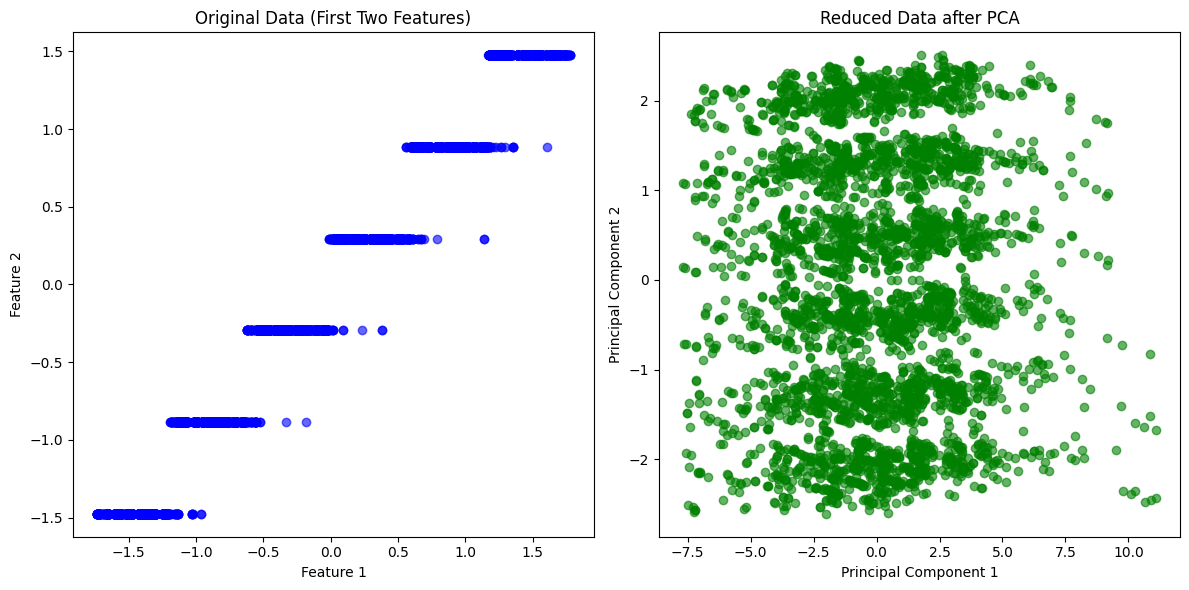

In [21]:

import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 6))

# Scatter plot of the first two features of the original data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1], alpha=0.6, c='blue')
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot reduced data after PCA
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, c='green')
plt.title("Reduced Data after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Show the plots
plt.tight_layout()
plt.show()
